Abalone

In [109]:
import numpy as np 
from sklearn import tree
from sklearn import preprocessing
import pandas as pd
import matplotlib.pyplot as plot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [3]:
#1. Load dataset
dataframe = pd.read_csv('abalone.csv')

In [4]:
dataset = dataframe.to_numpy()
X = dataset[:, 1:9]  
y = dataset[:,0]
print("X = ", X)
print("y = ", y)

X =  [[0.605 0.47 0.165 ... 0.2275 0.292 9]
 [0.55 0.425 0.15 ... 0.1765 0.2165 10]
 [0.46 0.345 0.11 ... 0.0885 0.1159999999999999 7]
 ...
 [0.695 0.55 0.195 ... 0.36 0.445 11]
 [0.585 0.475 0.165 ... 0.217 0.3 11]
 [0.565 0.45 0.165 ... 0.239 0.249 11]]
y =  ['F' 'M' 'M' ... 'M' 'F' 'F']


Type
M    1528
I    1342
F    1307
Name: count, dtype: int64


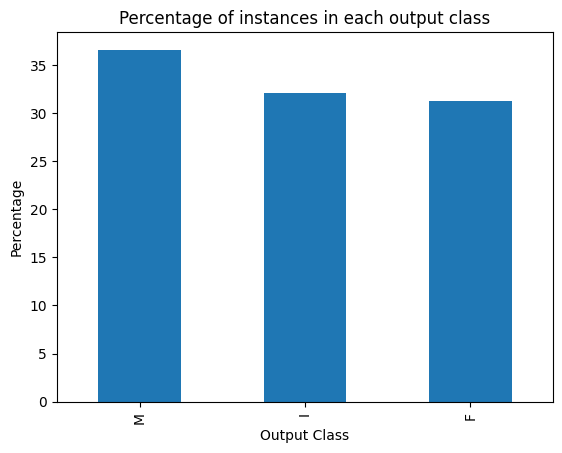

In [16]:
#2. Plot the percentage of instances in each output class
#Count the instances of each class
class_counts = dataframe['Type'].value_counts()
print(class_counts)
#Calculate percentages
class_percentages = class_counts / class_counts.sum() * 100

#Plot the graph
class_percentages.plot(kind='bar')
plot.xlabel('Output Class')
plot.ylabel('Percentage')
plot.title('Percentage of instances in each output class')
plot.savefig('abalone-classes.png', format='png')
plot.show()

In [20]:
#3. Split the dataset using default values
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [91]:
#Class stats to calculate avarage and variance for multiple runs of a classifier
class Stats:    
    def __init__(self):
        self.accuracy_list = []
        self.macro_average_F1_list = []
        self.weighted_average_F1_list = []

    def append_accuracy(self,value):
        self.accuracy_list.append(value)
    def append_macro_average_f1(self,value):
        self.macro_average_F1_list.append(value)    
    def append_weighted_average_f1(self,value):
        self.weighted_average_F1_list.append(value)

    def report(self):
        accuracy_array = np.array(self.accuracy_list)
        macro_average_F1_array = np.array(self.macro_average_F1_list)
        weighted_average_F1_array = np.array(self.weighted_average_F1_list)

        accuracy_mean = np.mean(accuracy_array)
        accuracy_variance = np.var(accuracy_array)

        macro_average_F1_mean = np.mean(macro_average_F1_array)
        macro_average_F1_variance = np.var(macro_average_F1_array)

        weighted_average_F1_mean = np.mean(weighted_average_F1_array)
        weighted_average_F1_variance = np.var(weighted_average_F1_array)

        print('(A) Accuracy: Mean =', accuracy_mean, ', Variance =', accuracy_variance)
        print('(B) Macro Average F1: Mean =', macro_average_F1_mean, ', Variance =', macro_average_F1_variance)
        print('(C) Weighted Average F1: Mean =', weighted_average_F1_mean, ', Variance =', weighted_average_F1_variance)


    

4(a)


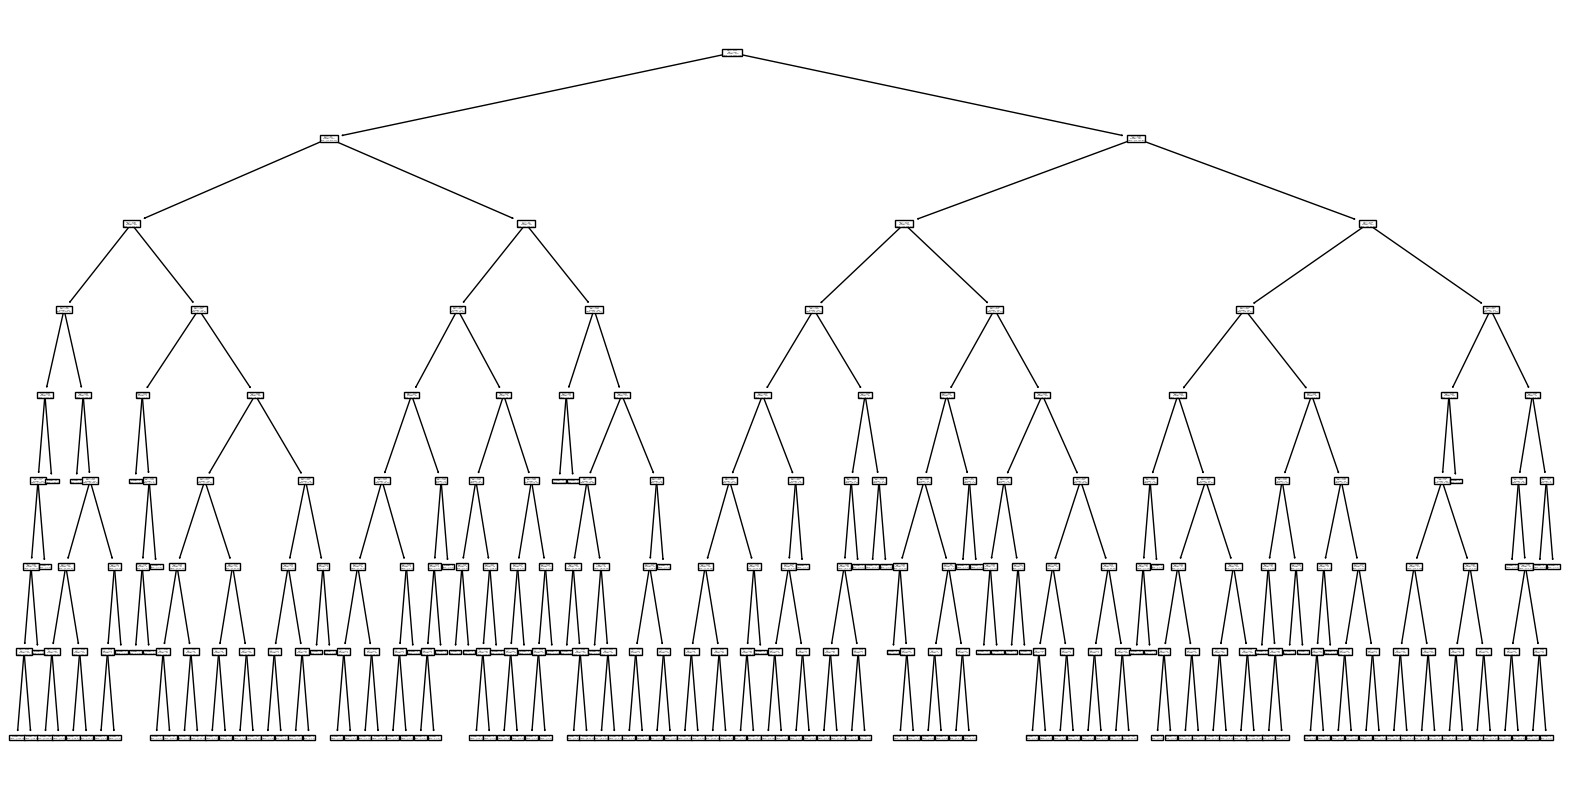

5(a)
(A) Base-DT-max_depth=8
(B) Confusion Matrix:

 [[120  34 180]
 [ 41 236  64]
 [ 95  64 211]]

(C) (D) Classification metrics:

              precision    recall  f1-score   support

           F       0.47      0.36      0.41       334
           I       0.71      0.69      0.70       341
           M       0.46      0.57      0.51       370

    accuracy                           0.54      1045
   macro avg       0.55      0.54      0.54      1045
weighted avg       0.54      0.54      0.54      1045

6(a)
(A) Accuracy: Mean = 0.5444976076555024 , Variance = 1.4651679219797558e-06
(B) Macro Average F1: Mean = 0.5408474309933988 , Variance = 1.850185856905416e-06
(C) Weighted Average F1: Mean = 0.5409222362660119 , Variance = 1.611910935543936e-06


In [115]:
#4,5,6 for (a)Base-DT 
#Performance evaluation
stats = Stats()

for i in range(1,6):
    dtc = tree.DecisionTreeClassifier(max_depth=8)
    dtc.fit(X_train, y_train)
    y_pred = dtc.predict(X_test)
    
    if(i==1):        
        print("4(a)")
        plot.figure(figsize=(20, 10))  
        tree.plot_tree(dtc)
        plot.show()
        print("5(a)")
        print("(A) Base-DT-max_depth=8")        
        print("(B) Confusion Matrix:\n\n", confusion_matrix(y_test, y_pred))

        print("\n(C) (D) Classification metrics:\n")
        print(classification_report(y_test, y_pred))

    report_dict = classification_report(y_test, y_pred, output_dict=True)

    stats.append_accuracy(report_dict['accuracy'])
    stats.append_macro_average_f1(report_dict['macro avg']['f1-score'])
    stats.append_weighted_average_f1(report_dict['weighted avg']['f1-score'])

print("6(a)")
stats.report()

4(b)


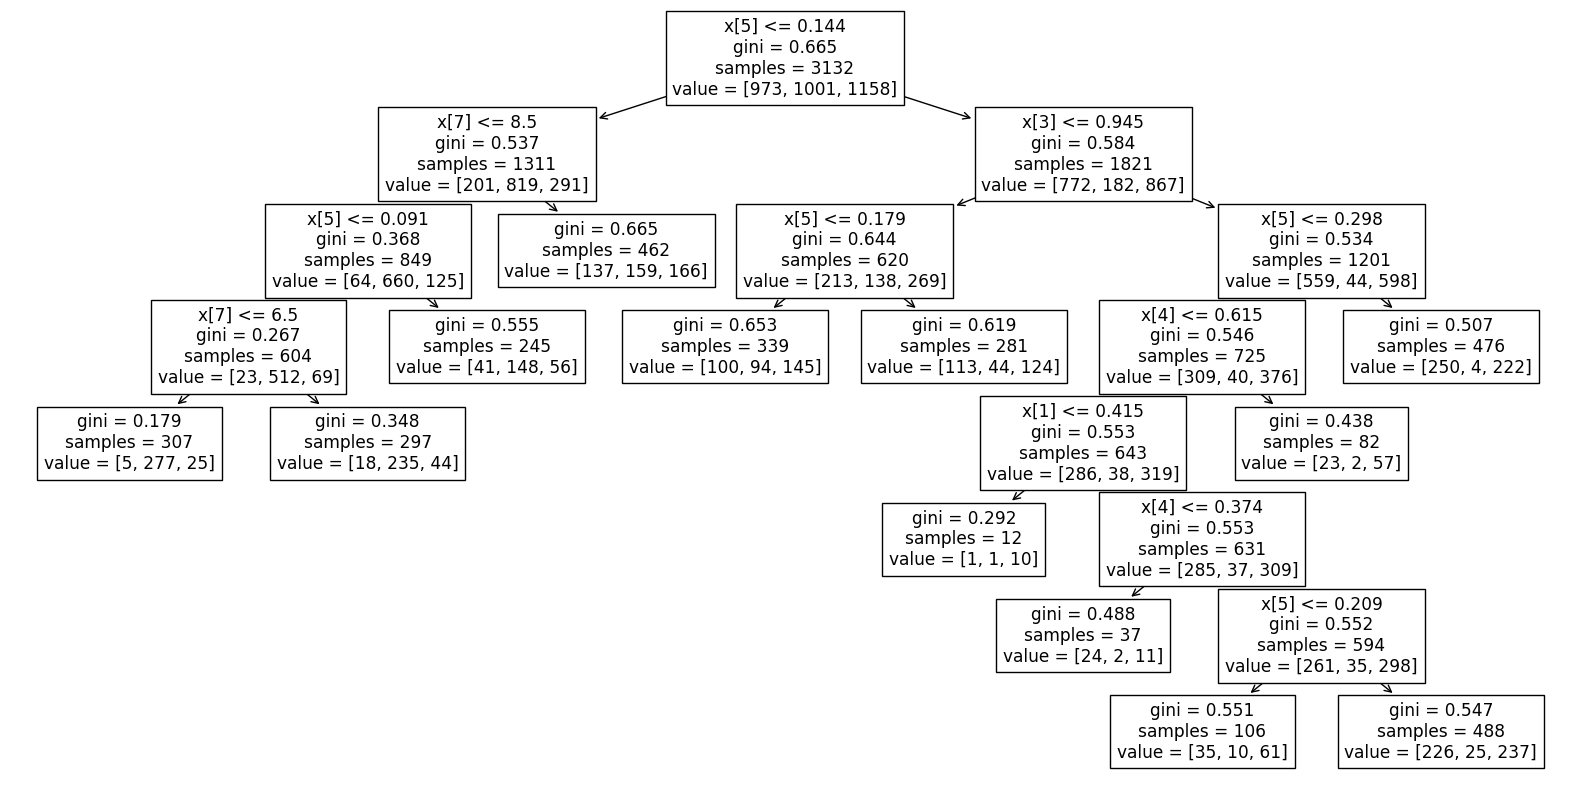

5(b)
(A) Top-DT-criterion=gini-max_depth=10-min_samples_split=500
(B) Confusion Matrix:

 [[ 82  19 233]
 [  4 217 120]
 [ 75  44 251]]

(C) (D) Classification metrics:

              precision    recall  f1-score   support

           F       0.51      0.25      0.33       334
           I       0.78      0.64      0.70       341
           M       0.42      0.68      0.52       370

    accuracy                           0.53      1045
   macro avg       0.57      0.52      0.52      1045
weighted avg       0.56      0.53      0.52      1045

6(b)
(A) Accuracy: Mean = 0.5263157894736842 , Variance = 0.0
(B) Macro Average F1: Mean = 0.5151954426066857 , Variance = 0.0
(C) Weighted Average F1: Mean = 0.5164328782555966 , Variance = 0.0


In [108]:
#4,5,6 for (b)Top-DT
#Performance evaluation

stats = Stats()
param_grid = {
    'max_depth': [10, 15, None],  # Depth of the tree
    'min_samples_split': [10, 200, 500],  # Minimum number of samples required to split a node    
    'criterion': ['gini', 'entropy']  # Function to measure the quality of a split
}

for i in range(1,6):
    
    dtc = tree.DecisionTreeClassifier()
    grid_search = GridSearchCV(estimator=dtc, param_grid=param_grid)
    grid_search.fit(X_train, y_train)
    best_params = grid_search.best_params_
    best_dtc = grid_search.best_estimator_

    y_pred = best_dtc.predict(X_test)
    
    if(i==1):
        print("4(b)")
        plot.figure(figsize=(20, 10))
        tree.plot_tree(best_dtc)
        plot.show()
        print("5(b)")
        print(f"(A) Top-DT-criterion={best_params['criterion']}-"
              f"max_depth={best_params['max_depth']}-"
              f"min_samples_split={best_params['min_samples_split']}"
        )        
        print("(B) Confusion Matrix:\n\n", confusion_matrix(y_test, y_pred))

        print("\n(C) (D) Classification metrics:\n")
        print(classification_report(y_test, y_pred))
   
    report_dict = classification_report(y_test, y_pred, output_dict=True)

    stats.append_accuracy(report_dict['accuracy'])
    stats.append_macro_average_f1(report_dict['macro avg']['f1-score'])
    stats.append_weighted_average_f1(report_dict['weighted avg']['f1-score'])

print("6(b)")
stats.report()

In [114]:
#4,5,6 for (c)Base-MLP
#Performance evaluation
stats = Stats()

for i in range(1,6):
    
    mlp = MLPClassifier(hidden_layer_sizes=(100,100), activation='logistic', solver = 'sgd')
    mlp.fit(X, y)
    
    y_pred = mlp.predict(X_test)
    
    if(i==1):        
        print("5(c)")
        print("(A) Base-MLP-"
              "hidden_layer_sizes=(100,100)-"
              "activation=logistic-"
              "solver=sdg")
        print("(B) Confusion Matrix:\n\n", confusion_matrix(y_test, y_pred))

        print("\n(C) (D) Classification metrics:\n")
        print(classification_report(y_test, y_pred))

    report_dict = classification_report(y_test, y_pred, output_dict=True)

    stats.append_accuracy(report_dict['accuracy'])
    stats.append_macro_average_f1(report_dict['macro avg']['f1-score'])
    stats.append_weighted_average_f1(report_dict['weighted avg']['f1-score'])

print("6(c)")
stats.report()

C:\Users\Daria\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Daria\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Daria\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Daria\AppData\Local\Programs\Python\Pyt

5(c)
(A) Base-MLP-hidden_layer_sizes=(100,100)-activation=logistic-solver=sdg
(B) Confusion Matrix:

 [[  0  49 285]
 [  0 225 116]
 [  0  75 295]]

(C) (D) Classification metrics:

              precision    recall  f1-score   support

           F       0.00      0.00      0.00       334
           I       0.64      0.66      0.65       341
           M       0.42      0.80      0.55       370

    accuracy                           0.50      1045
   macro avg       0.36      0.49      0.40      1045
weighted avg       0.36      0.50      0.41      1045



C:\Users\Daria\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Daria\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Daria\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Daria\AppData\Local\Programs\Python\Pyt

6(c)
(A) Accuracy: Mean = 0.4979904306220096 , Variance = 2.1977518829698885e-07
(B) Macro Average F1: Mean = 0.40218857729007873 , Variance = 1.413426488525331e-07
(C) Weighted Average F1: Mean = 0.4090959782942704 , Variance = 1.4936048446154282e-07


C:\Users\Daria\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Daria\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Daria\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Daria\AppData\Local\Programs\Python\Pyt

In [112]:
#4,5,6 for (d)Top-MLP
#Performance evaluation
stats = Stats()

hidden_layer_sizes=(100,100)
param_grid = {
    'activation': ['logistic','tanh','relu'],
    'hidden_layer_sizes' : [(30,50),(10,10,10)],
    'solver': ['adam','sgd']
}

for i in range(1,6):
    mlp = MLPClassifier()
    grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid)
    grid_search.fit(X_train, y_train)
    best_params = grid_search.best_params_
    best_mlp = grid_search.best_estimator_

    y_pred = best_mlp.predict(X_test)
    
    if(i==1):        
        print("5(d)")
        print(f"(A) Top-MLP-activation={best_params['activation']}-"
              f"hidden_layer_sizes={best_params['hidden_layer_sizes']}-"
              f"solver={best_params['solver']}"
        )         
        print("(B) Confusion Matrix:\n\n", confusion_matrix(y_test, y_pred))

        print("\n(C) (D) Classification metrics:\n")
        print(classification_report(y_test, y_pred))

    report_dict = classification_report(y_test, y_pred, output_dict=True)

    stats.append_accuracy(report_dict['accuracy'])
    stats.append_macro_average_f1(report_dict['macro avg']['f1-score'])
    stats.append_weighted_average_f1(report_dict['weighted avg']['f1-score'])

print("6(d)")
stats.report()

C:\Users\Daria\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Daria\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Daria\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Daria\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the opti

5(d)
(A) Top-MLP-activation=tanh-hidden_layer_sizes=(30, 50)-solver=adam
(B) Confusion Matrix:

 [[206  39  89]
 [ 49 265  27]
 [204  60 106]]

(C) (D) Classification metrics:

              precision    recall  f1-score   support

           F       0.45      0.62      0.52       334
           I       0.73      0.78      0.75       341
           M       0.48      0.29      0.36       370

    accuracy                           0.55      1045
   macro avg       0.55      0.56      0.54      1045
weighted avg       0.55      0.55      0.54      1045



C:\Users\Daria\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Daria\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Daria\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Daria\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the opti

6(d)
(A) Accuracy: Mean = 0.5429665071770334 , Variance = 0.00013794555985439927
(B) Macro Average F1: Mean = 0.5218432689479722 , Variance = 0.0007389901849128405
(C) Weighted Average F1: Mean = 0.5216999570515515 , Variance = 0.0005947989488100566


C:\Users\Daria\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
